<a href="https://colab.research.google.com/github/ebtisamasiri/T5/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [480]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [482]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [483]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [484]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [485]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [486]:
df.shape

(147972, 21)

In [487]:
df['Incident_Number']

,Incident_Number
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
147967,NaN
147968,NaN
147969,90323827
147970,NaN


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='Count'>

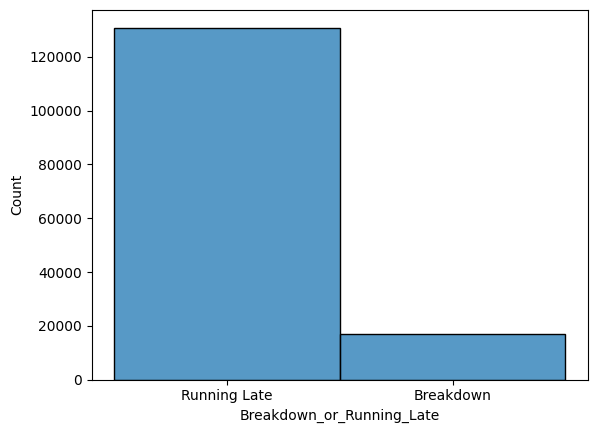

In [488]:
#histogram
sns.histplot(df['Breakdown_or_Running_Late'])

<Axes: xlabel='count', ylabel='Reason'>

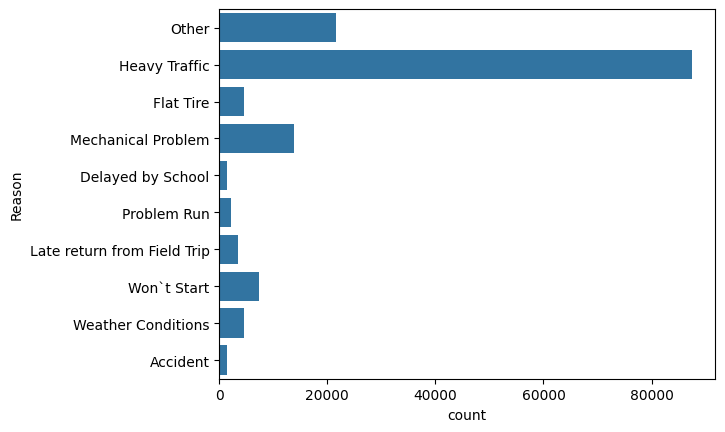

In [489]:
#countplot
sns.countplot(y='Reason', data=df)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [491]:
#correlation
# numeric_df = df.select_dtypes(include=['number'])
# sns.heatmap(numeric_df.corr(), annot=True)

#not usefull for before encoding..

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [492]:
#Missibg values:
#How_Long_Delayed	21630
#Incident_Number	142340
#Boro	6318
#Reason	102
#Route_Number	88
#Run_Type	89

#shape = (147972, 21)

In [493]:
#droping an entire column
df = df.drop([ 'School_Year'], axis=1)#'Incident_Number',

In [494]:
# #droping null rows
# df.dropna(subset=['Reason'], inplace=True)
# df.dropna(subset=['Route_Number'], inplace=True)
# df.dropna(subset=['Run_Type'], inplace=True)
# df.dropna(subset=['Run_Type'], inplace=True)

In [495]:
#droping null rows
df.dropna(inplace=True)

In [496]:
df['How_Long_Delayed'].unique()

array(['30Min', '45min', '20 min', '??????', '454 min', '40-50 MIN',
       '40 MIN', '1/2 hr', '45MINS', '40 mins', '20 minutes', '5 m',
       '15 minutes', '11', '45', '15-20', '45 minutes', '45-50 MIN',
       '1 HOUR', '30MNS', '21 min', '2hr', '60mn', '45 MINS', '20MNS',
       '20-25 min', '90 MIN', '1hr', '30 mins', '45 MIN', '20 mins',
       '1 hour', '1/2  HOUR', '20-35 MINS', '25MN', '20 MIN', 'unknown',
       '30 minutes', '25 MIN', '40-1HR', '45-1HR', '40 MINS', '20mins',
       '1 HR', '45 min', '10-15mints', '10 min', '10MIN', '15 mins',
       '35 min', '35 MIN', '30 MIN', '20', '30mins', '10 mins', '30 min',
       '30MIN', '30', '20mns', '20MIN', '15 MIN', '10minutes', '15mins',
       '20minutes', '30 MINUTES', '25 MINUTES', '20 mint', '50min',
       '10 mint', '35 MINUTES', '15 min', '10 minutes', '10MNS', '25mins',
       '45MIN', '45Mins', '20 MINUTES', '1HR', '40mins', '45 MINUTES',
       '25 mins', '15 mint', '30 minute', '1 hr', '25 mint', '20min',
       '

In [497]:
#split the strings like '15 MINUTES', '80 MIN' and make it only mumbers of minutes like 15, 80

In [498]:
# def delay_min(x):
#         n = [int(s) for s in x.split() if s.isint()]
#         return max(n) if n else None
# df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(delay_min)

In [499]:
def str2num(x):
    if isinstance(x, str):
        numbers = [int(s) for s in x.split() if s.isdigit()]
        return max(numbers) if numbers else None
    else:
        return None
df['How_Long_Delayed'] = df['How_Long_Delayed'].apply(str2num)
df

,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
1375,1225377,Special Ed AM Run,1296,P615,Accident,25154,10/28/2015 06:25:00 AM,10/28/2015 06:31:00 AM,Manhattan,ACME BUS CORP. (B2321),NaN,0,Yes,Yes,Yes,10/28/2015 06:31:00 AM,2776550,10/28/2015 06:44:16 AM,Running Late,School-Age
1842,1216474,Special Ed PM Run,19340,M147,Accident,02347,09/21/2015 03:15:00 PM,09/21/2015 03:50:00 PM,Manhattan,"BORO TRANSIT, INC.",NaN,8,Yes,Yes,Yes,09/21/2015 03:50:00 PM,2737089,09/21/2015 03:50:10 PM,Running Late,School-Age
2587,1226096,Special Ed AM Run,GC0085,X979,Accident,07223,10/29/2015 07:39:00 AM,10/29/2015 08:05:00 AM,Bronx,G.V.C. LTD. (B2192),20.0,5,Yes,No,Yes,10/29/2015 08:05:00 AM,2777814,10/29/2015 08:29:01 AM,Running Late,School-Age
3153,1226288,General Ed AM Run,5301,K1383,Accident,"13508,17316",10/30/2015 06:35:00 AM,10/30/2015 06:44:00 AM,Brooklyn,JOFAZ TRANSPORTATION INC.,NaN,8,Yes,Yes,Yes,10/30/2015 06:44:00 AM,2778855,10/30/2015 07:27:11 AM,Running Late,School-Age
3367,1213115,Special Ed AM Run,016303,X879,Accident,09462,09/09/2015 07:19:00 AM,09/09/2015 07:32:00 AM,Bronx,HOYT TRANSPORTATION CORP.,454.0,1,Yes,Yes,Yes,09/09/2015 07:32:00 AM,2710619,09/09/2015 07:38:01 AM,Running Late,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147153,1354740,Special Ed AM Run,1847,L034,Heavy Traffic,"17375,17904",06/02/2017 06:37:00 AM,06/02/2017 06:39:00 AM,Brooklyn,B & F SKILLED INC.(B2192),20.0,3,Yes,Yes,Yes,06/02/2017 06:39:00 AM,90327560,06/02/2017 10:09:39 AM,Running Late,School-Age
147201,1359833,Special Ed PM Run,GC0921,X901,Heavy Traffic,11068,06/21/2017 02:10:00 PM,06/21/2017 02:20:00 PM,Bronx,G.V.C. LTD. (B2192),NaN,0,Yes,No,Yes,06/21/2017 02:20:00 PM,90336193,06/21/2017 03:04:51 PM,Running Late,School-Age
147244,1356198,Special Ed AM Run,GC0124,X953,Heavy Traffic,07004,06/07/2017 07:40:00 AM,06/07/2017 08:03:00 AM,Bronx,G.V.C. LTD. (B2192),NaN,6,Yes,Yes,Yes,06/07/2017 08:03:00 AM,90330033,06/07/2017 10:42:37 AM,Running Late,School-Age
147276,1357686,Special Ed AM Run,GC0105,Y813,Heavy Traffic,11494,06/14/2017 06:47:00 AM,06/14/2017 06:48:00 AM,Bronx,G.V.C. LTD. (B2192),NaN,2,Yes,Yes,Yes,06/14/2017 06:48:00 AM,90333015,06/14/2017 08:07:42 AM,Running Late,School-Age


In [500]:
#droping null rows
df.dropna(inplace=True)

In [501]:
# df['How_Long_Delayed']= df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mean(), inplace=True)
# df['Boro']= df['Boro'].fillna(df['Boro'].mode()[0],inplace=True)

In [502]:
df.isnull().sum()

,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [503]:

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le



In [504]:
# # df = pd.get_dummies(df)
#removw 'Bus_No',Schools_Serviced,Bus_Company_Name, 	Have_You_Alerted_OPT, School_Age_or_PreK
# df = pd.get_dummies(df, columns=[ 'Route_Number','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents'])

In [505]:
# Feature Selection
df.drop(['Busbreakdown_ID', 'Bus_No', 'Route_Number', 'Schools_Serviced', 'Occurred_On',
           'Created_On', 'Bus_Company_Name', 'Informed_On', 'Incident_Number',
           'Last_Updated_On'], axis=1, inplace=True)


In [506]:
#scale
scaler = StandardScaler()
df[['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']] = scaler.fit_transform(
    df[['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']])

In [507]:
df.duplicated().sum()

2248

In [508]:
df.drop_duplicates(inplace=True)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [510]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [512]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [513]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [514]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [516]:
# #ensure numeric
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [517]:
# print(X_test.dtypes)

In [518]:
# for column in X_train.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     X_train[column] = le.fit_transform(X_train[column])
#     X_test[column] = le.transform(X_test[column])

In [520]:
# y_train = y_train.astype('int')

In [521]:
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])


In [522]:
if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

In [523]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-523-e7bfbb09a8ed>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 39, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 747, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 40, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 743, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_11645]

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('ann_bus_breakdown_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: